<a href="https://colab.research.google.com/github/Tenntucky/Lambda_DS_2_Wine_/blob/master/Kole_Goldsberry_DS_Build_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 3*

---


# Model Interpretation 1

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Continue to iterate on your project: data cleaning, exploration, feature engineering, modeling.
- [ ] Make at least 1 partial dependence plot to explain your model.
- [ ] Share at least 1 visualization on Slack.

If you have not yet completed an initial model yet for your portfolio project, you can do today's assignment using your Tanzania Waterpumps model. An example solution will be provided.

**Multi-class classification** will result in multiple Partial Dependence Plots (one for each class).

## Stretch Goals
- [ ] Make multiple PDPs with 1 feature in isolation.
- [ ] Make multiple PDPs with 2 features in interaction. 
- [ ] Use Plotly to make a 3D PDP.
- [ ] Make PDPs with categorical feature(s). Use Ordinal Encoder, outside of a pipeline, to encode your data first. If there is a natural ordering, then take the time to encode it that way, instead of random integers. Then use the encoded data with pdpbox. Get readable category names on your plot, instead of integer category codes.

## Links
- [Christoph Molnar: Interpretable Machine Learning — Partial Dependence Plots](https://christophm.github.io/interpretable-ml-book/pdp.html) + [animated explanation](https://twitter.com/ChristophMolnar/status/1066398522608635904)
- [Kaggle / Dan Becker: Machine Learning Explainability — Partial Dependence Plots](https://www.kaggle.com/dansbecker/partial-plots)
- [Plotly: 3D PDP example](https://plot.ly/scikit-learn/plot-partial-dependence/#partial-dependence-of-house-value-on-median-age-and-average-occupancy)

In [2]:
import pandas as pd
# !pip install category_encoders==2.*
# !pip install eli5

df = pd.read_csv('winemag-data-130k-v2.csv')
df.shape

(129971, 14)

In [3]:
df.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


In [4]:
df['variety'].value_counts()

Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
                            ...  
Žilavka                         1
Petit Meslier                   1
Meseguera                       1
Merlot-Grenache                 1
Kotsifali                       1
Name: variety, Length: 707, dtype: int64

These features are being removed because they have no enfluence at predicting the wines. Unless one twitter handle is always talking about Pinot Noir for example. Either way that is not how I want my model to predict the variety.

In [0]:
df['description'] = df['description'].str.lower()

In [6]:
import re

def wrangle(X):
  X = X.copy()

  X = X.drop(columns=['Unnamed: 0','price','region_1','region_2','taster_name',
                      'taster_twitter_handle','title','winery'])

  remove_words = {'a','about','above','across','after','against','along','amidst',
               'among','amongst','and','around','as','at','barring','before',
               'behind','below','beneath','beside','besides','between','beyond',
               'bottling','by','circa','comes','concerning','despite','down',
               'during','in','inside','into','is','except','excluding','for',
               'following','from','like','much','near','next','past','per',
               'round','since','of','off','on','onto','opposite','out','outside',
               'over','plus','rather','regular','than','this','through',
               'throughout','till','times','to','toward','towards','under',
               'underneath','unlike','until','unto','up','upon','via','while',
               'with','within','without','the','2012','white blend',
               'portuguese red', 'pinot gris', 'riesling','pinot noir','tempranillo-merlot','frappato','gewürztraminer',
               'cabernet sauvignon','nerello mascalese','chardonnay','malbec',
               'tempranillo blend','meritage','red blend','merlot',
               "nero d'avola", 'chenin blanc','gamay','sauvignon blanc',
               'viognier-chardonnay', 'primitivo', 'catarratto', 'inzolia',
               'petit verdot', 'monica', 'bordeaux-style white blend', 'grillo',
               'sangiovese', 'cabernet franc', 'champagne blend',
               'bordeaux-style red blend', 'aglianico', 'petite sirah',
               'touriga nacional', 'carmenère', 'albariño', 'petit manseng',
               'rosé', 'zinfandel', 'vernaccia', 'rosato', 'grüner veltliner',
               'viognier', 'vermentino', 'grenache blanc', 'syrah', 'nebbiolo',
               'shiraz-cabernet sauvignon', 'pinot blanc', 'alsace white blend',
               'barbera', 'rhône-style red blend', 'portuguese white', 'graciano',
               'tannat-cabernet', 'sauvignon', 'sangiovese grosso', 'torrontés',
               'prugnolo gentile', 'g-s-m', 'verdejo', 'fumé blanc', 'furmint',
               'pinot bianco', 'bonarda', 'shiraz', 'montepulciano', 'moscato',
               'grenache', 'ugni blanc-colombard', 'syrah-viognier',
               'blaufränkisch', 'friulano', 'assyrtico', 'carignan-grenache',
               'sagrantino', 'savagnin', 'cabernet sauvignon-syrah', 'prosecco',
               'vignoles', 'sparkling blend', 'muscat', 'muscadelle',
               'shiraz-viognier', 'garganega', 'pinot grigio', 'tempranillo',
               'zierfandler', 'cortese', 'mencía', 'zweigelt', 'melon',
               'rhône-style white blend', 'vidal', 'cannonau', 'verdelho',
               'marsanne', 'scheurebe', 'kerner', 'syrah-grenache', 'dolcetto',
               'vilana', 'glera', 'viura', 'garnacha tintorera', 'pinot nero',
               'roter veltliner', 'pinotage', 'sémillon', 'pinot noir-gamay',
               'antão vaz', 'cabernet sauvignon-carmenère', 'verdejo-viura',
               'verduzzo', 'verdicchio', 'silvaner', 'colombard', 'carricante',
               'sylvaner', 'fiano', 'sousão', 'roussanne', 'avesso', 'cinsault',
               'chinuri', 'tinta miúda', 'muscat blanc à petits grains',
               'portuguese sparkling', 'monastrell', 'xarel-lo', 'greco',
               'trebbiano', 'corvina, rondinella, molinara', 'port',
               'chenin blanc-chardonnay', 'insolia', 'merlot-malbec',
               'ribolla gialla', 'cabernet sauvignon-merlot', 'duras',
               'weissburgunder', 'roditis', 'traminer', 'papaskarasi',
               'tannat-syrah', 'marsanne-roussanne', 'charbono', 'prié blanc',
               'sherry', 'provence red blend', 'tannat', 'zibibbo', 'falanghina',
               'garnacha', 'negroamaro', 'mourvèdre', 'syrah-cabernet',
               'müller-thurgau', 'pinot meunier', 'cabernet sauvignon-sangiovese',
               'austrian red blend', 'teroldego', 'pansa blanca',
               'muskat ottonel', 'sauvignon blanc-semillon', 'claret',
               'semillon-sauvignon blanc', 'bical', 'moscatel', 'rosado',
               'viura-chardonnay', 'baga', 'malvasia bianca',
               'gelber muskateller', 'malbec-merlot', 'monastrell-syrah',
               'malbec-tannat', 'malbec-cabernet franc', 'turbiana', 'refosco',
               'alvarinho', 'manzoni', 'aragonês', 'agiorgitiko', 'malagousia',
               'assyrtiko', 'ruché', 'welschriesling', 'tinta de toro',
               'cabernet moravia', 'rieslaner', 'traminette', 'chambourcin',
               'nero di troia', 'lambrusco di sorbara', 'cesanese',
               'feteasca neagra', 'lagrein', 'tinta fina', 'st. laurent',
               'marsanne-viognier', 'cabernet sauvignon-shiraz',
               'syrah-cabernet sauvignon', 'gewürztraminer-riesling',
               'pugnitello', 'cerceal', 'touriga nacional blend',
               'austrian white blend', 'tocai', 'tinta roriz',
               'chardonnay-viognier', 'fernão pires',
               'cabernet franc-cabernet sauvignon', 'grenache-syrah',
               'seyval blanc', 'muscat canelli', 'cabernet merlot',
               'tempranillo-cabernet sauvignon', 'arinto', 'aragonez',
               'merlot-cabernet franc', 'syrah-petite sirah', 'cabernet blend',
               'maturana', 'pecorino', 'rotgipfler', 'cabernet franc-carmenère',
               'magliocco', 'gamay noir', 'sauvignon gris', 'spätburgunder',
               'picpoul', 'vidal blanc', 'white port', 'arneis', 'malvasia',
               'plavac mali', 'lemberger', 'saperavi', 'altesse', 'blanc du bois',
               'provence white blend', 'nosiola', 'dornfelder',
               'roussanne-viognier', 'godello', 'mondeuse', 'perricone',
               'pedro ximénez', 'auxerrois', 'syrah-merlot', 'albana', 'muskat',
               'lambrusco', 'cabernet sauvignon-malbec', 'tinto fino',
               'malbec-cabernet sauvignon', 'moschofilero', 'grechetto',
               'encruzado', 'carignano', 'cabernet franc-merlot', 'torbato',
               'syrah-petit verdot', 'garnacha blanca', 'pallagrello',
               'syrah-mourvèdre', 'aleatico', 'kisi', 'shiraz-grenache',
               'palomino', 'grenache-carignan', 'nascetta', 'siria',
               'malbec-syrah', 'asprinio', 'feteascǎ regalǎ',
               'lambrusco grasparossa', 'marselan', 'tocai friulano', 'schiava',
               'alfrocheiro', 'chardonnay-semillon', 'corvina', 'norton',
               'alicante bouschet', 'tokaji', 'moscadello',
               'cabernet sauvignon-tempranillo', 'carignan', 'cabernet-syrah',
               'sauvignon blanc-chardonnay', 'symphony', 'edelzwicker',
               'madeira blend', 'black muscat', 'grenache noir', 'durella',
               'xinomavro', 'tinto del pais', 'merlot-cabernet sauvignon',
               'johannisberg riesling', 'petite verdot', 'passerina', 'valdiguié',
               'colombard-sauvignon blanc', 'loureiro', 'posip', 'uva di troia',
               'gros and petit manseng', 'jacquère', 'kalecik karasi',
               'mourvèdre-syrah', 'negrette', 'zierfandler-rotgipfler',
               'clairette', 'raboso', 'mauzac', 'pinot auxerrois',
               'chenin blanc-sauvignon blanc', 'marzemino', 'tinta barroca',
               'chardonnay-sauvignon blanc', 'castelão', 'trebbiano spoletino',
               'teran', 'trepat', 'freisa', 'neuburger', 'sämling', 'chasselas',
               'hárslevelü', 'trincadeira', 'merlot-tannat', 'rkatsiteli',
               'melnik', 'trousseau gris', 'grenache blend', 'gros manseng',
               'portuguese rosé', 'brachetto', 'mantonico', 'muskateller',
               'aligoté', 'sangiovese cabernet',
               'touriga nacional-cabernet sauvignon', 'muscat blanc', 'argaman',
               'viognier-roussanne', 'pallagrello bianco', 'bobal',
               'malvasia istriana', 'cabernet sauvignon-cabernet franc',
               'baco noir', 'veltliner', 'morillon', 'touriga franca', 'picolit',
               'prieto picudo', 'gaglioppo', 'tokay', 'sacy', 'piedirosso',
               'mansois', 'chardonnay-sauvignon', 'tempranillo-garnacha',
               'carmenère-cabernet sauvignon', 'chenin blanc-viognier',
               'susumaniello', 'vitovska', 'orange muscat', 'grauburgunder',
               'carignane', 'moscatel roxo', 'tannat-merlot', 'nerello cappuccio',
               'counoise', 'macabeo', 'mazuelo', 'tinta del pais', 'vranec',
               'mavrud', "cesanese d'affile", 'moscato giallo', 'debit',
               'cabernet', 'verduzzo friulano ', 'treixadura', "loin de l'oeil",
               'coda di volpe', 'grenache-mourvèdre', 'viura-verdejo',
               'bombino bianco', 'pinot-chardonnay', 'syrah-tempranillo',
               'merlot-cabernet', "muscat d'alexandrie", 'jaen', 'tinta del toro',
               'timorasso', 'pigato', 'sangiovese-cabernet sauvignon',
               'shiraz-cabernet', 'viognier-gewürztraminer',
               'sauvignon blanc-chenin blanc', 'malbec-petit verdot',
               'colombard-ugni blanc', 'grignolino', 'garnacha-syrah', 'rufete',
               'tempranillo-shiraz', 'mtsvane', 'marawi',
               'chardonnay-pinot blanc', 'mataro', 'tinta cao',
               'blauer portugieser', 'ugni blanc', 'groppello',
               'semillon-chardonnay', 'alvarelhão', 'poulsard', 'grenache-shiraz',
               'baga-touriga nacional', 'carineña', 'pignoletto', 'muscatel',
               'mavrodaphne', 'ciliegiolo', 'viognier-grenache blanc',
               'greco bianco', 'cabernet sauvignon-merlot-shiraz', 'sciaccerellu',
               'alicante', 'emir', 'rosenmuskateller', 'narince',
               'malbec-cabernet', 'touriga', 'grecanico', 'carmenère-syrah',
               'madeleine angevine', 'muscat hamburg', 'tempranillo blanco',
               'casavecchia', 'white riesling', 'hondarrabi zuri', 'nuragus',
               'xynisteri', 'kadarka', 'roussanne-marsanne', 'incrocio manzoni',
               'bual', 'okuzgozu', 'rivaner', 'lambrusco salamino',
               'sangiovese-syrah', 'tannat-cabernet franc', 'fer servadou',
               'mission', 'kekfrankos', 'marquette', 'romorantin',
               'verdejo-sauvignon blanc', 'braucol', 'malvasia-viura',
               'savatiano', 'cabernet franc-malbec', 'pallagrello nero', 'rebula',
               'vespolina', 'shiraz-malbec', 'rebo', 'macabeo-chardonnay',
               'tamjanika', 'trousseau', 'bacchus', 'syrah-cabernet franc',
               'cariñena-garnacha', 'plyto', 'códega do larinho', 'Çalkarası',
               'azal', 'moscatel graúdo', 'viosinho', 'rara neagra',
               'malvasia di candia', 'maria gomes', 'malvar', 'airen', 'erbaluce',
               'muscat of alexandria', 'abouriou', 'pinot noir-syrah',
               'nielluciu', 'malbec-bonarda', 'sauvignon blanc-verdejo',
               'garnacha-monastrell', 'vinhão', 'souzao', 'roter traminer',
               'moscatel de alejandría', 'rolle', 'tinta francisca',
               'malvasia nera', 'portuguiser', 'listán negro', 'muscadine',
               'grolleau', 'zlahtina', 'jacquez', 'gouveio', 'canaiolo',
               'carignan-syrah', 'bovale', 'cabernet-shiraz', 'syrah-carignan',
               'elbling', 'gragnano', 'garnacha blend', 'pinot blanc-chardonnay',
               'bastardo', 'chardonnay weissburgunder', 'other', 'robola',
               'malagouzia', 'malbec blend', 'merlot-syrah', 'cabernet pfeffer',
               'morio muskat', 'rabigato', 'babić', 'roviello', 'yapincak',
               'viognier-marsanne', 'mandilaria', 'alvarinho-chardonnay',
               'saperavi-merlot', 'garnacha-tempranillo', 'trebbiano di lugana',
               'albarossa', 'verdeca', 'cabernet sauvignon grenache',
               'tămâioasă românească', 'black monukka', 'tempranillo-syrah',
               'uvalino', 'boğazkere', 'cayuga', 'moscato rosa', 'chelois',
               'shiraz-tempranillo', 'ansonica', 'durif', 'malbec-tempranillo',
               'nasco', 'monastrell-petit verdot', 'sirica', 'apple', 'Feteasca',
               'malvasia fina', 'chancellor', 'cabernet franc-lemberger',
               'chardonnay-albariño', 'shiraz-mourvèdre', 'trollinger'}

  pat = r'\b(?:{})\b'.format('|'.join(remove_words))
  X['new'] = X['description'].str.replace(pat, '')


  return X
  
df = wrangle(df)
df.head()

,country,description,designation,points,province,variety,new
0,Italy,"aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,Sicily & Sardinia,White Blend,"aromas include tropical fruit, broom, brimston..."
1,Portugal,"this is ripe and fruity, a wine that is smooth...",Avidagos,87,Douro,Portuguese Red,"ripe fruity, wine that smooth still stru..."
2,US,"tart and snappy, the flavors of lime flesh and...",NaN,87,Oregon,Pinot Gris,"tart snappy, flavors lime flesh rind domin..."
3,US,"pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,Michigan,Riesling,"pineapple rind, lemon pith orange blossom sta..."
4,US,"much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,Oregon,Pinot Noir,", rough tannic, rustic, earthy, h..."


In [7]:
df.isna().sum()

country           63
description        0
designation    37465
points             0
province          63
variety            1
new                0
dtype: int64

In [0]:
df = df.dropna()

In [10]:
df.shape

(92454, 7)

In [11]:
def wrangle2(X):
  X = X.copy()

  X = X.drop(columns=['description'])

  # Sight
  clear = X['new'].str.contains('clear')
  slightly_cloudy = X['new'].str.contains('slighty cloudy')
  cloudy = X['new'].str.contains('cloudy')
  X.loc[clear, 'clarity sight'] = 'clear'
  X.loc[slightly_cloudy, 'clarity sight'] = 'slightly cloudy'
  X.loc[cloudy, 'clarity sight'] = 'cloudy'
  
  dull = X['new'].str.contains('dull')
  bright = X['new'].str.contains('bright')
  brilliant = X['new'].str.contains('brilliant')
  X.loc[dull, 'brightness sight'] = 'dull'
  X.loc[bright, 'brightness sight'] = 'bright'
  X.loc[brilliant, 'brightness sight'] = 'brilliant'
  
  pale = X['new'].str.contains('pale')
  medium = X['new'].str.contains('medium')
  deep = X['new'].str.contains('deep')
  translucent = X['new'].str.contains('translucent')
  opaque = X['new'].str.contains('opaque')
  X.loc[pale, 'concentration sight'] = 'pale'
  X.loc[medium, 'concentration sight'] = 'medium'
  X.loc[deep, 'concentration sight'] = 'deep'
  X.loc[translucent, 'concentration sight'] = 'translucent'
  X.loc[opaque, 'concentration sight'] = 'opaque'

  gas_ev_yes = X['new'].str.contains('gas')
  X.loc[gas_ev_yes, 'concentration sight'] = 'yes'

  sediment = X['new'].str.contains('sediment')
  X.loc[sediment, 'sediment sight'] = 'yes'

  straw = X['new'].str.contains('straw')
  yellow = X['new'].str.contains('yellow')
  gold = X['new'].str.contains('gold')
  purple = X['new'].str.contains('purple')
  ruby = X['new'].str.contains('ruby')
  garnet = X['new'].str.contains('garnet')
  X.loc[straw, 'colour sight'] = 'straw'
  X.loc[yellow, 'colour sight'] = 'yellow'
  X.loc[gold, 'colour sight'] = 'gold'
  X.loc[purple, 'colour sight'] = 'purple'
  X.loc[ruby, 'colour sight'] = 'ruby'
  X.loc[garnet, 'colour sight'] = 'garnet'

  silver = X['new'].str.contains('silver')
  green = X['new'].str.contains('green')
  orange = X['new'].str.contains('orange')
  blue = X['new'].str.contains('blue')
  brown = X['new'].str.contains('brown')
  X.loc[silver, 'hue sight'] = 'silver'
  X.loc[green, 'hue sight'] = 'green'
  X.loc[orange, 'hue sight'] = 'orange'
  X.loc[blue, 'hue sight'] = 'blue'
  X.loc[ruby, 'hue sight'] = 'ruby'
  X.loc[garnet, 'hue sight'] = 'garnet'
  X.loc[brown, 'hue sight'] = 'brown'

  # X['rim variation sight']

  stain = X['new'].str.contains('stain')
  X.loc[stain, 'extract sight'] = 'yes'
  # X['viscosity sight']

  # Nose
  tca = X['new'].str.contains('tca')
  h2s = X['new'].str.contains('h2s')
  va = X['new'].str.contains('va')
  ea = X['new'].str.contains('ea')
  brett = X['new'].str.contains('brett')
  oxidation = X['new'].str.contains('oxidation')
  X.loc[tca, 'clean nose'] = 'tca'
  X.loc[h2s, 'clean nose'] = 'h2s'
  X.loc[va, 'clean nose'] = 'va'
  X.loc[ea, 'clean nose'] = 'ea'
  X.loc[brett, 'clean nose'] = 'brett'
  X.loc[oxidation, 'clean nose'] = 'oxidation'
  
  delicate = X['new'].str.contains('delicate')
  powerful = X['new'].str.contains('powerful')
  X.loc[delicate, 'intensity nose'] = 'delicate'
  X.loc[powerful, 'intensity nose'] = 'powerful'

  youthful = X['new'].str.contains('youthful')
  vinous = X['new'].str.contains('vinous')
  X.loc[delicate, 'age assessment nose'] = 'youthful'
  X.loc[powerful, 'age assessment nose'] = 'vinous'

  apple = X['new'].str.contains('apple')
  malic = X['new'].str.contains('malic')
  citric = X['new'].str.contains('citric')
  stone = X['new'].str.contains('stone')
  tropical = X['new'].str.contains('tropical')
  melon = X['new'].str.contains('melon')
  berry = X['new'].str.contains('berry')
  red = X['new'].str.contains('red')
  black = X['new'].str.contains('black')
  X.loc[apple, 'fruit nose'] = 'apple'
  X.loc[malic, 'fruit nose'] = 'malic'
  X.loc[citric, 'fruit nose'] = 'citric'
  X.loc[stone, 'fruit nose'] = 'stone'
  X.loc[tropical, 'fruit nose'] = 'tropical'
  X.loc[melon, 'fruit nose'] = 'melon'
  X.loc[berry, 'fruit nose'] = 'berry'
  X.loc[red, 'fruit nose'] = 'red'
  X.loc[black, 'fruit nose'] = 'black'
  X.loc[blue, 'fruit nose'] = 'blue'

  baked = X['new'].str.contains('baked')
  stewed = X['new'].str.contains('stewed')
  dried = X['new'].str.contains('dried')
  peel = X['new'].str.contains('peel')
  skin = X['new'].str.contains('skin')
  tart = X['new'].str.contains('tart')
  ripe = X['new'].str.contains('ripe')
  jammy = X['new'].str.contains('jammy')
  X.loc[baked, 'fruit character nose'] = 'baked'
  X.loc[stewed, 'fruit character nose'] = 'stewed'
  X.loc[dried, 'fruit character nose'] = 'dried'
  X.loc[peel, 'fruit character nose'] = 'peel'
  X.loc[skin, 'fruit character nose'] = 'skin'
  X.loc[tart, 'fruit character nose'] = 'tart'
  X.loc[ripe, 'fruit character nose'] = 'ripe'
  X.loc[jammy, 'fruit character nose'] = 'jammy'

  floral = X['new'].str.contains('floral')
  vegetable = X['new'].str.contains('vegetable')
  herbal = X['new'].str.contains('herbal')
  spice = X['new'].str.contains('spice')
  vinification = X['new'].str.contains('vinification')
  mlf = X['new'].str.contains('mlf')
  cm = X['new'].str.contains('cm')
  chocolate = X['new'].str.contains('chocolate')
  coffee = X['new'].str.contains('coffee')
  liquorice = X['new'].str.contains('liquorice')
  olive = X['new'].str.contains('olive')
  X.loc[floral, 'non-fruit nose'] = 'floral'
  X.loc[vegetable, 'non-fruit nose'] = 'vegetable'
  X.loc[herbal, 'non-fruit nose'] = 'herbal'
  X.loc[spice, 'non-fruit nose'] = 'spice'
  X.loc[vinification, 'non-fruit nose'] = 'vinification'
  X.loc[mlf, 'non-fruit nose'] = 'mlf'
  X.loc[cm, 'non-fruit nose'] = 'cm'
  X.loc[chocolate, 'non-fruit nose'] = 'chocolate'
  X.loc[coffee, 'non-fruit nose'] = 'coffee'
  X.loc[liquorice, 'non-fruit nose'] = 'liquorice'
  X.loc[olive,'non-fruit nose'] = 'olive'

  forest = X['new'].str.contains('forest')
  compost = X['new'].str.contains('compost')
  mushroom = X['new'].str.contains('mushroom')
  soil = X['new'].str.contains('soil')
  farm = X['new'].str.contains('farm')
  X.loc[forest, 'earth organic nose'] = 'forest'
  X.loc[compost, 'earth organic nose'] = 'compost'
  X.loc[mushroom, 'earth organic nose'] = 'mushroom'
  X.loc[soil, 'earth organic nose'] = 'soil'
  X.loc[farm, 'earth organic nose'] = 'farm'

  mineral = X['new'].str.contains('mineral')
  limestone = X['new'].str.contains('limestone')
  chalk = X['new'].str.contains('chalk')
  slate = X['new'].str.contains('slate')
  petrol = X['new'].str.contains('petrol')
  flint = X['new'].str.contains('flint')
  volcanic = X['new'].str.contains('volcanic')
  X.loc[mineral, 'earth inorganic nose'] = 'mineral'
  X.loc[limestone, 'earth inorganic nose'] = 'limestone'
  X.loc[chalk, 'earth inorganic nose'] = 'chalk'
  X.loc[slate, 'earth inorganic nose'] = 'slate'
  X.loc[petrol, 'earth inorganic nose'] = 'petrol'
  X.loc[flint, 'earth inorganic nose'] = 'flint'
  X.loc[volcanic, 'earth inorganic nose'] = 'volcanic'

  meaty = X['new'].str.contains('meaty')
  leather = X['new'].str.contains('leather')
  truffle = X['new'].str.contains('truffle')
  dusty = X['new'].str.contains('dusty')
  X.loc[meaty, 'tertiary nose'] = 'meaty'
  X.loc[leather, 'tertiary nose'] = 'leather'
  X.loc[truffle, 'tertiary nose'] = 'truffle'
  X.loc[dusty, 'tertiary nose'] = 'dusty'

  french = X['new'].str.contains('french')
  american = X['new'].str.contains('american')
  X.loc[french, 'wood nose'] = 'french'
  X.loc[american, 'wood nose'] = 'american'

  # Palate - Structure
  dry = X['new'].str.contains('dry')
  sweet = X['new'].str.contains('sweet')
  X.loc[dry, 'sweetness palate structure'] = 'dry'
  X.loc[sweet, 'sweetness palate structure'] = 'sweet'

  '''
  X['tannin palate structure']
  X['acid palate structure']
  X['alcohol palate structure']
  X['body palate structure']

  # Palate - Flavour
  X['fruit palate flavour']
  X['fruit character palate flavour']
  X['non-fruit palate flavour']
  X['organic earth palate flavour']
  X['inorganic earth palate flavour']
  X['wood palate flavour']
  X['balance palate flavour']
  X['finish palate flavour']
  X['complexity palate flavour']

  # Initial Conclusion
  X['climate initial conclusion']
  X['age range initial conclusion']

  # Final Conclusion
  X['quality final conclusion'] = X['designation']
  '''
  return X

df = wrangle2(df)
df.head()

,country,designation,points,province,variety,new,clarity sight,brightness sight,concentration sight,sediment sight,colour sight,hue sight,extract sight,clean nose,intensity nose,age assessment nose,fruit nose,fruit character nose,non-fruit nose,earth organic nose,earth inorganic nose,tertiary nose,wood nose,sweetness palate structure
0,Italy,Vulkà Bianco,87,Sicily & Sardinia,White Blend,"aromas include tropical fruit, broom, brimston...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tropical,ripe,NaN,NaN,NaN,NaN,NaN,NaN
1,Portugal,Avidagos,87,Douro,Portuguese Red,"ripe fruity, wine that smooth still stru...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,ea,NaN,NaN,red,ripe,NaN,NaN,NaN,NaN,NaN,NaN
3,US,Reserve Late Harvest,87,Michigan,Riesling,"pineapple rind, lemon pith orange blossom sta...",NaN,NaN,NaN,NaN,NaN,orange,NaN,ea,NaN,NaN,apple,tart,NaN,NaN,NaN,NaN,NaN,dry
4,US,Vintner's Reserve Wild Child Block,87,Oregon,Pinot Noir,", rough tannic, rustic, earthy, h...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,ea,NaN,NaN,NaN,NaN,herbal,NaN,NaN,NaN,NaN,NaN
5,Spain,Ars In Vitro,87,Northern Spain,Tempranillo-Merlot,blackberry raspberry aromas show typical nav...,NaN,NaN,NaN,NaN,NaN,green,NaN,va,NaN,NaN,black,NaN,herbal,NaN,NaN,NaN,NaN,NaN


In [0]:
df.isna().sum()

country                           0
designation                       0
points                            0
province                          0
variety                           0
new                               0
clarity sight                 91940
brightness sight              83433
concentration sight           84630
sediment sight                92402
colour sight                  83211
hue sight                     77345
extract sight                 91887
clean nose                    22886
intensity nose                87741
age assessment nose           87741
fruit nose                    30798
fruit character nose          55456
non-fruit nose                62672
earth organic nose            88722
earth inorganic nose          82299
tertiary nose                 84949
wood nose                     90608
sweetness palate structure    69667
dtype: int64

In [12]:
df['variety'].nunique()

641

In [0]:
df = df.fillna('none')

In [14]:
df.describe(exclude='number')

,country,designation,province,variety,new,clarity sight,brightness sight,concentration sight,sediment sight,colour sight,hue sight,extract sight,clean nose,intensity nose,age assessment nose,fruit nose,fruit character nose,non-fruit nose,earth organic nose,earth inorganic nose,tertiary nose,wood nose,sweetness palate structure
count,92454,92454,92454,92454,92454,92454,92454,92454,92454,92454,92454,92454,92454,92454,92454,92454,92454,92454,92454,92454,92454,92454,92454
unique,42,37954,406,641,85379,3,4,7,2,7,8,2,6,3,3,11,9,11,6,8,5,3,3
top,US,Reserve,California,Pinot Noir,"cigar box, café au lait, dried tobacco aromas...",none,none,none,none,none,none,none,ea,none,none,none,none,none,none,none,none,none,none
freq,36908,2006,24359,9890,3,91940,83433,84630,92402,83211,77345,91887,65277,87741,87741,30798,55456,62672,88722,82299,84949,90608,69667


In [15]:
df.shape

(92454, 24)

In [16]:
df = df[df.duplicated(['variety'], keep=False)]
df.shape

(92320, 24)

In [17]:
df['variety'].unique()

array(['White Blend', 'Portuguese Red', 'Riesling', 'Pinot Noir',
       'Tempranillo-Merlot', 'Frappato', 'Gewürztraminer', 'Pinot Gris',
       'Cabernet Sauvignon', 'Nerello Mascalese', 'Malbec',
       'Tempranillo Blend', 'Red Blend', 'Merlot', "Nero d'Avola",
       'Gamay', 'Viognier-Chardonnay', 'Primitivo', 'Inzolia',
       'Petit Verdot', 'Monica', 'Bordeaux-style White Blend',
       'Chardonnay', 'Grillo', 'Sangiovese', 'Cabernet Franc',
       'Champagne Blend', 'Sauvignon Blanc', 'Bordeaux-style Red Blend',
       'Aglianico', 'Petite Sirah', 'Touriga Nacional', 'Carmenère',
       'Petit Manseng', 'Rosé', 'Zinfandel', 'Vernaccia', 'Meritage',
       'Viognier', 'Vermentino', 'Grenache Blanc', 'Syrah', 'Nebbiolo',
       'Shiraz-Cabernet Sauvignon', 'Alsace white blend', 'Chenin Blanc',
       'Barbera', 'Rhône-style Red Blend', 'Portuguese White', 'Graciano',
       'Tannat-Cabernet', 'Sauvignon', 'Sangiovese Grosso',
       'Prugnolo Gentile', 'G-S-M', 'Verdejo', 'Furm

In [18]:
df.isna().sum()

country                       0
designation                   0
points                        0
province                      0
variety                       0
new                           0
clarity sight                 0
brightness sight              0
concentration sight           0
sediment sight                0
colour sight                  0
hue sight                     0
extract sight                 0
clean nose                    0
intensity nose                0
age assessment nose           0
fruit nose                    0
fruit character nose          0
non-fruit nose                0
earth organic nose            0
earth inorganic nose          0
tertiary nose                 0
wood nose                     0
sweetness palate structure    0
dtype: int64

In [19]:
# Number of wines lost to removing single entries
x = 129971 - 129830
print(x)

141


In [20]:
df['variety'].nunique()

507

141 Wines were individualy represented here, I feel those were specialty wines of one kind and should be removed, as that description will always come up with that single wine. 

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split

trainval, test = train_test_split(df, train_size=0.8, test_size=0.20, 
                                  stratify=df['variety'], random_state=42)

train, val = train_test_split(
    trainval, train_size=0.80, test_size=0.02, 
    stratify=trainval['variety'], random_state=42)

target = 'variety'

X_train =  train.drop(columns=target)
X_val = val.drop(columns=target)
X_test = test.drop(columns=target)
y_train = train[target]
y_val = val[target]
y_test = test[target]

print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_val shape', X_val.shape)
print('y_val shape', y_val.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

X_train shape (59084, 23)
y_train shape (59084,)
X_val shape (1478, 23)
y_val shape (1478,)
X_test shape (18464, 23)
y_test shape (18464,)


In [22]:
# This would lead you to believe that the baseline is 10.7%
# that sure is low, but it is the low 
df['variety'].value_counts(normalize=True)

Pinot Noir            0.107127
Chardonnay            0.084933
Red Blend             0.080654
Cabernet Sauvignon    0.062825
Riesling              0.047584
                        ...   
Rosenmuskateller      0.000022
Viosinho              0.000022
Tinta Cao             0.000022
Freisa                0.000022
Durif                 0.000022
Name: variety, Length: 507, dtype: float64

In [23]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, min_samples_leaf=7, random_state=42, n_jobs=-1)
)

# Fit train, score val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.4512855209742896


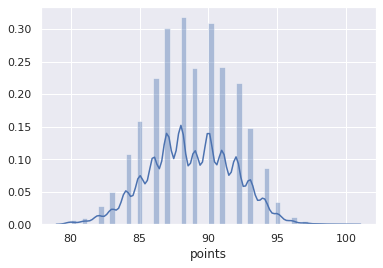

In [24]:
%matplotlib inline
import seaborn as sns

sns.set()
sns.distplot(X_train['points']);

Majority of the wine is in the upper 80's

In [25]:
df['points'].describe()

count    92320.000000
mean        88.744183
std          3.039541
min         80.000000
25%         87.000000
50%         89.000000
75%         91.000000
max        100.000000
Name: points, dtype: float64

In [26]:
df_100 = df[df['points'] == 100]
df_100.head()

,country,designation,points,province,variety,new,clarity sight,brightness sight,concentration sight,sediment sight,colour sight,hue sight,extract sight,clean nose,intensity nose,age assessment nose,fruit nose,fruit character nose,non-fruit nose,earth organic nose,earth inorganic nose,tertiary nose,wood nose,sweetness palate structure
345,Australia,Rare,100,Victoria,Muscat,"wine contains some material 100 years old, b...",none,none,none,none,none,brown,none,ea,none,none,black,dried,coffee,none,none,none,none,none
7335,Italy,Occhio di Pernice,100,Tuscany,Prugnolo Gentile,thick molasses dark caramelized brown sugar...,none,none,none,none,none,brown,none,ea,none,none,none,dried,coffee,none,none,none,none,none
36528,France,Brut,100,Champagne,Champagne Blend,fabulous wine greatest champagne vintage ...,none,none,none,none,none,green,none,ea,none,none,none,none,none,none,mineral,none,none,none
39286,Italy,Masseto,100,Tuscany,Merlot,"perfect wine classic vintage, 2007 masseto...",none,none,none,none,none,none,none,va,none,none,black,none,chocolate,none,none,none,none,none
42197,Portugal,Barca-Velha,100,Douro,Portuguese Red,latest release what has long been regarded...,none,none,none,none,none,none,none,ea,none,none,none,none,none,none,none,none,none,none


In [27]:
df_100['variety'].describe()

count                  13
unique                 11
top       Champagne Blend
freq                    2
Name: variety, dtype: object

In [29]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression


lr = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(), 
    StandardScaler(),
    LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
)

lr.fit(X_train, y_train)
score = lr.score(X_val, y_val)
print('Logistic Regression, Validation Accuracy', score)

Logistic Regression, Validation Accuracy 0.18267929634641408


In [0]:
encoder = pipeline.named_steps['ordinalencoder']
encoded = encoder.transform(X_train)

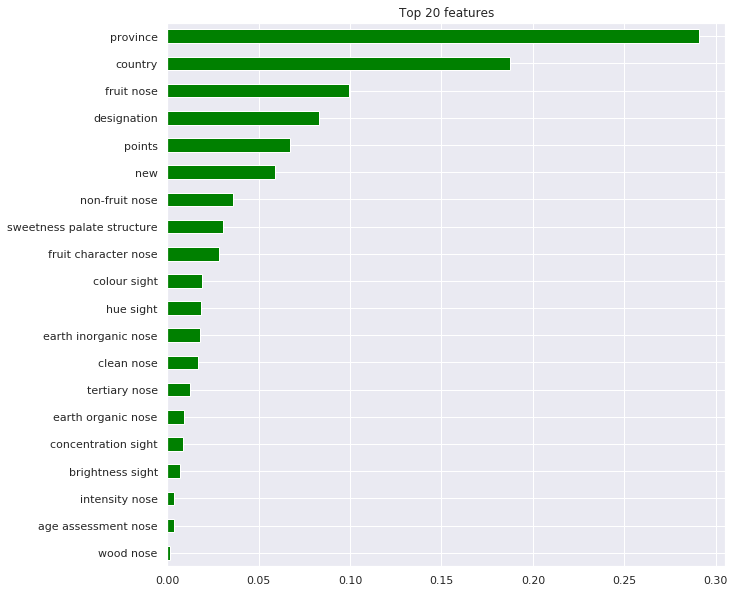

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, encoded.columns)

# Plot feature importances
n = 20
plt.figure(figsize=(10, n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='green');

In [0]:
from sklearn.metrics import confusion_matrix
# confusion_matrix(y_val, y_pred)

In [35]:
from sklearn.metrics import accuracy_score
y_pred = pipeline.predict(X_test)
print('Test Accuracy', accuracy_score(y_test, y_pred))

Test Accuracy 0.44020797227036396


In [36]:
confusion_matrix(y_test, y_pred)

array([[ 1,  0,  0, ...,  0,  0,  0],
       [ 0,  1,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0, 23,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [0]:
from sklearn.utils.multiclass import unique_labels
unique_labels(y_test)

array(['Abouriou', 'Agiorgitiko', 'Aglianico', 'Airen', 'Albana',
       'Albariño', 'Aleatico', 'Alfrocheiro', 'Alicante',
       'Alicante Bouschet', 'Aligoté', 'Alsace white blend', 'Altesse',
       'Alvarinho', 'Alvarinho-Chardonnay', 'Antão Vaz', 'Aragonez',
       'Aragonês', 'Argaman', 'Arinto', 'Arneis', 'Asprinio', 'Assyrtico',
       'Assyrtiko', 'Austrian Red Blend', 'Austrian white blend',
       'Auxerrois', 'Avesso', 'Azal', 'Babić', 'Baco Noir', 'Baga',
       'Barbera', 'Bical', 'Black Muscat', 'Blanc du Bois',
       'Blaufränkisch', 'Bobal', 'Bonarda', 'Bordeaux-style Red Blend',
       'Bordeaux-style White Blend', 'Bovale', 'Boğazkere', 'Brachetto',
       'Braucol', 'Bual', 'Cabernet', 'Cabernet Blend', 'Cabernet Franc',
       'Cabernet Franc-Cabernet Sauvignon', 'Cabernet Franc-Malbec',
       'Cabernet Franc-Merlot', 'Cabernet Merlot', 'Cabernet Sauvignon',
       'Cabernet Sauvignon-Cabernet Franc',
       'Cabernet Sauvignon-Carmenère', 'Cabernet Sauvignon-Ma

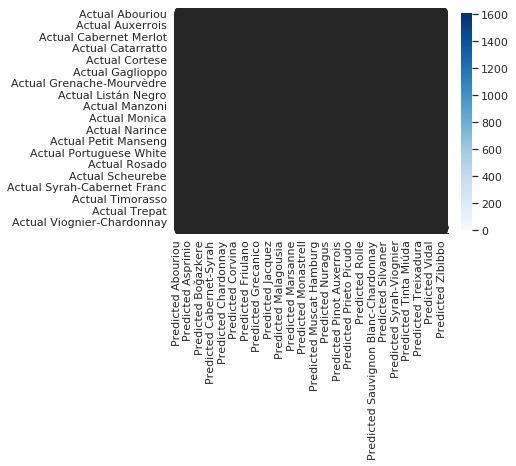

In [0]:
def plot_confusion_matrix(y_true, y_pred):
  labels = unique_labels(y_true)
  columns = [f'Predicted {label}' for label in labels]
  index = [f'Actual {label}' for label in labels]
  df = pd.DataFrame(confusion_matrix(y_true, y_pred),
                    columns = columns,
                    index = index)
  return sns.heatmap(df, annot=True, fmt='d', cmap='Blues')

plot_confusion_matrix(y_test, y_pred);